This project is based on [datacamp tutorial](https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/classification-and-regression-trees?ex=2)
Notes could be found [here](https://bourbon0212.github.io/DataCamp-Practice/Python/Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/Machine-Learning-with-Tree-Based-Models-in-Python.html#ensemble_learning)

A **classification tree**: divides the **feature space** into **rectangular regions.**
In contrast, a **linear model**: such as logistic regression produces only a **single linear decision boundary** dividing the feature space into two decision regions.

In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline



In [62]:
dataset=pd.read_csv("data.csv")

In [63]:
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#data=pd.read_csv("data.csv",usecols=["radius_mean","concave points_mean","diagnosis"])

In [64]:
X=data.drop("diagnosis",axis=1)
y=data["diagnosis"]

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

## DT  classifer 

### Entropy vs Gini index
The gini index is slightly 
- **faster** to compute and 
- is the **default criterion** used in the DecisionTreeClassifier model of scikit-learn.

In [66]:
dt_entropy=DecisionTreeClassifier(max_depth=8,criterion="entropy",random_state=1)
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [67]:
dt_gini=DecisionTreeClassifier(max_depth=8,criterion="gini",random_state=1)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [68]:
y_pred_entr=dt_entropy.predict(X_test)
y_pred_gini=dt_gini.predict(X_test)

### Evaluate DT

accuracy metric which corresponds to the **fraction of correct predictions** made on the test set.

In [69]:
acc_entropy=accuracy_score(y_test,y_pred_entr)
acc_gini=accuracy_score(y_test,y_pred_gini)

In [70]:
print('Accuracy achieved by using entropy: ', acc_entropy)
print('Accuracy achieved by using entropy: ', acc_gini)

Accuracy achieved by using entropy:  0.8859649122807017
Accuracy achieved by using entropy:  0.9210526315789473


### Compare with Logistic regression

In [71]:
logreg=LogisticRegression(random_state=1)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [72]:
y_pred2=logreg.predict(X_test)

In [73]:
acc2=accuracy_score(y_test,y_pred2)
print("Test set accuracy of LOgistic regression: {:.2f}".format(acc2))

Test set accuracy of LOgistic regression: 0.89


## Visualization and compare with Logit Regression

## DT regressor

In [190]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

In [118]:
mpg=pd.read_csv("auto.csv")
mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [102]:
### --------------------------Prep data-----------------
mpg_train=pd.get_dummies(mpg,columns=["origin"],prefix="origin")

In [103]:
### --------------------------Splitting-----------------
X=mpg_train.drop(["mpg"],axis=1)
y=mpg_train["mpg"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
### --------------------------Fit model------------------
dt=DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [120]:
## --------------------------Evaluate the performace-------
mse_dt=MSE(y_test,y_pred)
rmse_dt=np.sqrt(mse_dt)
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.27


### Compare with LR

In [131]:
from sklearn.linear_model import LinearRegression

In [125]:
lr=LinearRegression()
lr.fit(X_train,y_train)

In [126]:
y_pred_lr=lr.predict(X_test)
mse_lr=MSE(y_test,y_pred_lr)
rmse_lr=np.sqrt(mse_lr)
print("Test set RMSE of dt: {:.2f}".format(rmse_lr))

Test set RMSE of dt: 3.98


### Cross-validation

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
dt2=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.26,random_state=1,)

In [135]:
MSE_CV_scores=-cross_val_score(dt2,X_train,y_train,cv=10,
                             scoring="neg_mean_squared_error",
                             n_jobs=-1)
RMSE_CV=(MSE_CV_scores.mean())**(0.5)
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


### Train model

In [134]:
dt2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26)

In [136]:
y_pred_train=dt2.predict(X_train)
RMSE_train=MSE(y_train,y_pred_train)**(0.5)
print('CV RMSE: {:.2f}'.format(RMSE_train))

CV RMSE: 5.15


- dt suffers from **high bias** because **RMSE_CV ≈ RMSE_train**  

- dt is indeed **underfitting the training set** as the model is too constrained to capture the **nonlinear dependencies** between features and labels.

## Ensemble learning

### Indian_liver_classifer

In [173]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler

In [174]:
data=pd.read_csv("indian_liver_patient/indian_liver_patient_preprocessed.csv")

In [175]:
data.head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      579 non-null    int64  
 1   Age_std                         579 non-null    float64
 2   Total_Bilirubin_std             579 non-null    float64
 3   Direct_Bilirubin_std            579 non-null    float64
 4   Alkaline_Phosphotase_std        579 non-null    float64
 5   Alamine_Aminotransferase_std    579 non-null    float64
 6   Aspartate_Aminotransferase_std  579 non-null    float64
 7   Total_Protiens_std              579 non-null    float64
 8   Albumin_std                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio_std  579 non-null    float64
 10  Is_male_std                     579 non-null    int64  
 11  Liver_disease                   579 non-null    int64  
dtypes: float64(9), int64(3)
memory usage

In [181]:
X=data.drop(["Liver_disease"],axis=1)
y=data["Liver_disease"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,
                                               random_state=1)

In [138]:
SEED=1

#### Performance of different classifier

In [142]:
lr=LogisticRegression(random_state=SEED)
knn=KNN(n_neighbors=27)
dt=DecisionTreeClassifier(min_samples_leaf=0.13,random_state=SEED)

In [143]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

In [165]:
for clf_name,clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print("{:s}:{:.3f}".format(clf_name,accuracy_score(y_test,y_pred)))

Logistic Regression:0.764
K Nearest Neighbours:0.724
Classification Tree:0.730


/Users/yunzhang/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Voting Classifier
Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

In [166]:
from sklearn.ensemble import VotingClassifier

In [168]:
vc=VotingClassifier(estimators=classifiers)
vc.fit(X_train,y_train)

/Users/yunzhang/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(random_state=1)),
                             ('K Nearest Neighbours',
                              KNeighborsClassifier(n_neighbors=27)),
                             ('Classification Tree',
                              DecisionTreeClassifier(min_samples_leaf=0.13,
                                                     random_state=1))])

In [170]:
y_pred_vc=vc.predict(X_test)
accuracy_vc=accuracy_score(y_test,y_pred_vc)
print('Voting Classifier: {:.3f}'.format(accuracy_vc))

Voting Classifier: 0.764


#### Bagging classifier

In [177]:
from sklearn.ensemble import BaggingClassifier

In [182]:
dt=DecisionTreeClassifier(random_state=1)
bc=BaggingClassifier(base_estimator=dt,n_estimators=50,random_state=1)

In [179]:
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
acc_test=accuracy_score(y_test,y_pred)

In [180]:
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.69


##### OOB accuracy

In [183]:
dt=DecisionTreeClassifier(min_samples_leaf=8,
                          random_state=1)
bc=BaggingClassifier(base_estimator=dt,n_estimators=50,oob_score=True,random_state=1)

##### OOB Score vs Test Set Score

In [185]:
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
acc_test=accuracy_score(y_test,y_pred)
acc_oob=bc.oob_score_
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.684, OOB accuracy: 0.694


The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

#### AdaBoost classifier

In [198]:
from sklearn.ensemble import AdaBoostClassifier
dt=DecisionTreeClassifier(max_depth=2,random_state=1)
ada=AdaBoostClassifier(base_estimator=dt,n_estimators=180,random_state=1)
data=pd.read_csv("indian_liver_patient/indian_liver_patient_preprocessed.csv")

X=data.drop(["Liver_disease"],axis=1)
y=data["Liver_disease"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=1)
ada.fit(X_train,y_train)
y_pred_proba =ada.predict_proba(X_test)[:,1]

##### ROC_AUC score
In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

In [221]:
from sklearn.metrics import roc_auc_score
ada_roc_auc=roc_auc_score(y_test,y_pred_proba)
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.64


#### Hyperparameter tuning

##### Set the tree's hyperparameter grid

In [257]:
dt=DecisionTreeClassifier()
params_dt={"max_depth":[2,3,4],
          "min_samples_leaf":[0.12,0.14,0.16,0.18]}
grid_dt=GridSearchCV(estimator=dt,
                     param_grid=params_dt,
                     scoring='roc_auc',
                    cv=5,
                    n_jobs=-1)
grid_dt.fit(X_train,y_train)
best_model = grid_dt.best_estimator_
y_pred_proba=best_model.predict_proba(X_test)[:,1]
test_roc_auc=roc_auc_score(y_test,y_pred_proba)
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

### Bike_regressor

####  Random forest - regressor

In [191]:
from sklearn.ensemble import RandomForestRegressor

In [266]:
data=pd.read_csv("bikes.csv")

In [239]:
data.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [267]:
X=data.drop(["cnt"],axis=1)
y=data["cnt"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=1)

In [193]:
rf=RandomForestRegressor(n_estimators=25,random_state=2)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=25, random_state=2)

In [195]:
y_pred=rf.predict(X_test)
rmse_test=MSE(y_test,y_pred)**(0.5)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 50.01


You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

##### Feature importance
you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

In [196]:
importances=pd.Series(rf.feature_importances_,index=X.columns)

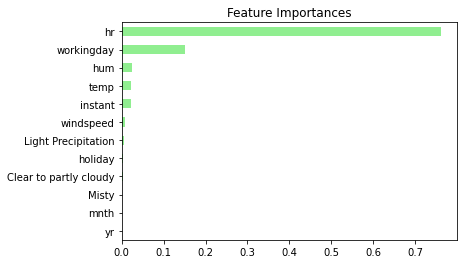

In [197]:
importances_sorted=importances.sort_values()
importances_sorted.plot(kind='barh',color='lightgreen')
plt.title("Feature Importances")
plt.show()

Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!

#### Gradient boost regressor

In [236]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(max_depth=4,n_estimators=200,random_state=2)

gb.fit(X_train,y_train)
y_pred=gd.predict(X_test)
RMSE=MSE(y_test,y_pred)**(0.5)
print('Test set RMSE of rf: {:.2f}'.format(RMSE))

Test set RMSE of rf: 43.11


#### Stochastic Gradient Boosting regressor

In [218]:
from sklearn.ensemble import GradientBoostingRegressor

In [237]:
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

In [241]:
sgbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, max_features=0.75, n_estimators=200,
                          random_state=2, subsample=0.9)

In [244]:
y_pred=sgbr.predict(X_test)
mse_test = MSE(y_test,y_pred)
rmse_test = mse_test**(0.5)
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 46.816


In [247]:
from sklearn.model_selection import GridSearchCV

In [245]:
dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(max_depth=2, random_state=1)>

In [254]:
data=pd.read_csv("indian_liver_patient/indian_liver_patient_preprocessed.csv")

In [255]:
X=data.drop(["Liver_disease"],axis=1)
y=data["Liver_disease"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,
                                               random_state=1)

#### Hyperparameter tuning

##### check parameter

In [269]:
rf=DecisionTreeRegressor()
rf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

##### Set the hyperparameter grid

In [274]:
params_rf ={"n_estimators":[100,350,500],
           "max_features":["log2","auto","sqrt"],
           "min_samples_leaf":[2,10,30]}

In [275]:
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring="neg_mean_squared_error",
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [273]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter n_estimators for estimator DecisionTreeRegressor(max_features='log2', min_samples_leaf=2). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)
rmse_test = MSE(y_test,y_pred)**(0.5)
print('Test RMSE of best model: {:.3f}'.format(rmse_test))